<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/3%E7%AB%A0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

path = os.getcwd()

print(path)

try:
    os.chdir(path + "/drive/My Drive/実践データ分析_100本ノック")
except:
    pass

os.getcwd()

/content


'/content/drive/My Drive/実践データ分析_100本ノック'

In [3]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0a8a441099836c1ca5cee7da026514a64a71885a31292a48b8866d7f2d9327e7
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [4]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import japanize_matplotlib

%matplotlib inline

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveity = "all"


In [8]:
!ls ./Data/

campaign_master.csv  customer_master.csv  Sample.gsheet		    transaction_2.csv
class_master.csv     item_master.csv	  SpreadsheetSample.gsheet  transaction_detail_1.csv
customer_join.csv    kokyaku_daicho.xlsx  transaction_1.csv	    transaction_detail_2.csv


In [14]:
import glob

for f in glob.glob('./Data/3章/*.csv'):
  print(os.path.split(f)[1])

class_master.csv
customer_master.csv
campaign_master.csv
use_log.csv
customer_join.csv


In [16]:
import pathlib

d = {}

p_temp = pathlib.Path('./Data/3章').glob('*.csv')
for p in p_temp:
  f = p.name.split('.')[0]
  df = pd.read_csv('./Data/3章/' + p.name)
  d[f]= df


In [17]:
dk = list(d.keys())
dk[0]

'class_master'

In [18]:
uselog = d['use_log']
customer = d['customer_master']
class_master = d['class_master']
campaign_master = d['campaign_master']
display(customer.head())
display(customer.isnull().sum())
len(customer)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0


4192

#ノック２２：顧客データを整形しよう


In [19]:
customer_join = pd.merge(customer, class_master, on="class", how='left')
customer_join = pd.merge(customer_join, campaign_master, on ="campaign_id", how="left")
display(customer_join.head())
len(customer_join)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


4192

In [20]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


#ノック２３：顧客データの基礎集計をしよう


In [21]:
customer_join.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


In [22]:
customer_join.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


In [23]:
customer_join.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1983
M,2209


In [24]:
customer_join.groupby("is_deleted").count()["customer_id"]

,customer_id
is_deleted,
0,2842
1,1350


In [25]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [ ]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   object        
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 393.0+ KB


In [ ]:
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
len(customer_start)

1361

In [ ]:
customer_start.groupby("is_deleted").count()["customer_id"]

is_deleted
0    716
1    645
Name: customer_id, dtype: int64

In [ ]:
customer_start.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額    359
入会費無料    317
通常       685
Name: customer_id, dtype: int64

In [ ]:
camp = pd.get_dummies(customer_start['campaign_name'])
customer_start_ = pd.concat([customer_start,camp],axis=1)
customer_start_ = customer_start_.set_index('start_date')
graph_ = customer_start_.resample('M').sum()
graph_.index = graph_.index.strftime('%B')

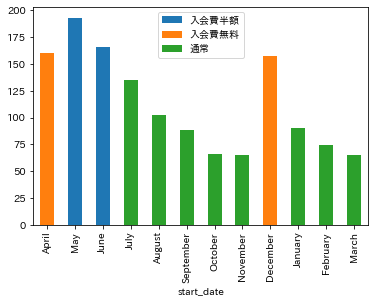

In [ ]:
graph_[['入会費半額','入会費無料','通常']].plot.bar(stacked=True)
y1 = graph_['入会費半額']

#ノック２４：最新顧客データの基礎集計をしてみる


In [ ]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime('20190331')) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
customer_newer.groupby('class_name').count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [ ]:
customer_newer.groupby('campaign_name').count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [ ]:
customer_newer.groupby('gender').count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

#ノック２５：利用履歴データを集計

In [ ]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime("%Y%m")
uselog

,log_id,customer_id,usedate,年月
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [ ]:
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"},inplace=True)
uselog_months

,年月,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [ ]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean","median","max","min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [ ]:

uselog_customer.describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


#ノック２６：利用履歴から定期利用グラフを作成

In [ ]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog

,log_id,customer_id,usedate,年月,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [ ]:
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"],as_index=False)\
.count()[["customer_id","年月","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"},inplace=True)
uselog_weekday

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [ ]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id","count"]]
uselog_weekday.loc[:,["routing_flg"]] = 0


In [ ]:
uselog_weekday["routing_flg"] = uselog_weekday["routing_flg"].where(uselog_weekday["count"]<4,1)
uselog_weekday.head()

,customer_id,count,routing_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


#ノック２７：顧客データと利用履歴データを結合

In [ ]:
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [ ]:
uselog_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  4192 non-null   object 
 1   mean         4192 non-null   float64
 2   median       4192 non-null   float64
 3   max          4192 non-null   int64  
 4   min          4192 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 163.9+ KB


In [ ]:
uselog_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   count        4192 non-null   int64 
 2   routing_flg  4192 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 131.0+ KB


In [ ]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 393.0+ KB


In [ ]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id",how="inner")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id","routing_flg"]], on="customer_id", how='inner')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routing_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routing_flg         0
dtype: int64

#ノック２８：会員期間を計算しよう

In [ ]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
 11  mean           4192 non-null   float64       
 12  median         4192 non-null   float64       
 13  max            4192 non-null   int64         
 14  min            4192 non-null   int64         
 15  routing_flg    4192 n

In [ ]:
from dateutil.relativedelta import relativedelta

def delta_calc(end, start):
  delta = relativedelta(end,start)
  return delta.years*12+delta.months

In [ ]:
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = customer_join.apply(lambda x: delta_calc(x["calc_date"],x["start_date"]),axis=1)
customer_join.head(3).append(customer_join.tail(3))


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routing_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1
4191,IK692635,XXXXX,C02,F,2019-03-15,NaT,CA1,0,デイタイム,7500,通常,10.000000,10.0,10,10,0,2019-04-30,1


#ノック２９：顧客行動の各種統計量を把握しよう

In [ ]:
customer_join[["mean","median","max","min","membership_period"]].describe()

,mean,median,max,min,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269,18.835878
std,1.777533,1.874874,2.168959,1.951565,13.848148
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000,7.000000
50%,5.000000,5.000000,8.000000,3.000000,15.000000
75%,6.416667,6.500000,9.000000,4.000000,30.000000
max,12.000000,12.000000,14.000000,12.000000,47.000000


In [ ]:
customer_join.groupby("routing_flg").count()["customer_id"]

routing_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

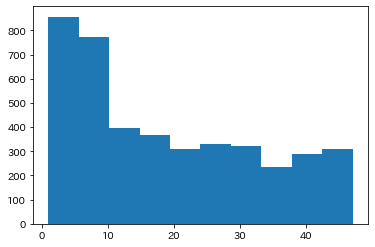

In [ ]:
plt.hist(customer_join["membership_period"])